In [3]:
import h5py
import os
import glob
import obspy
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import heapq

In [92]:
froot ="/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.h5"
flists = np.sort(glob.glob(froot))

XMIN = 3000
XMAX = 9000

fp = h5py.File(flists[0], 'r')
rawData = fp['Acquisition']['Raw[0]']['RawData'][XMIN:XMAX, :].astype(float)

Text(0.5, 1.0, 'raw data')

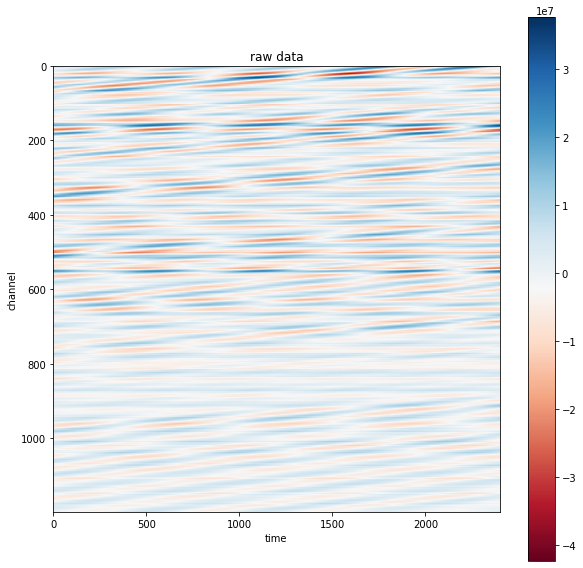

In [156]:
plt.figure(figsize = (10, 10))
plt.imshow(rawData[::5, ::5], cmap = 'RdBu', aspect = 2)
plt.colorbar()
plt.xlabel("time")
plt.ylabel("channel")
plt.title("raw data")

## high frequency spatial signal

Text(0.5, 0, 'channel')

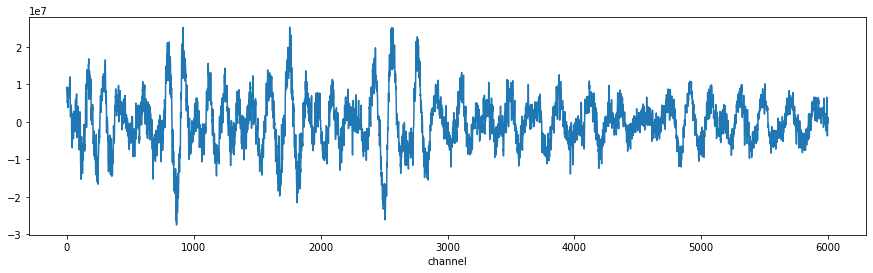

In [148]:
plt.figure(figsize = (15, 4))
plt.plot(rawData[:, 100])
plt.xlabel("channel")

Text(0.5, 0, 'time')

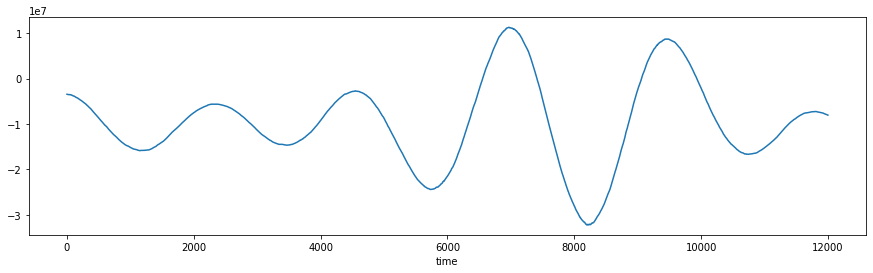

In [151]:
plt.figure(figsize = (15, 4))
plt.plot(rawData[100, :])
plt.xlabel("time")

## filtering in the spatial axis 

In [141]:
d = np.zeros([6000, 12000])
t = obspy.Trace()
t.stats.delta = 0.01              #being lazzy to use obspy filter. will change to numpy fft
for i in tqdm(range(12000)):
    t.data = rawData[:, i]
    d[:, i] = t.copy().filter('lowpass', freq=5, zerophase=True).data   # the freq here should indicate wavelength

100%|██████████| 12000/12000 [00:11<00:00, 1044.86it/s]


Text(0, 0.5, 'channel')

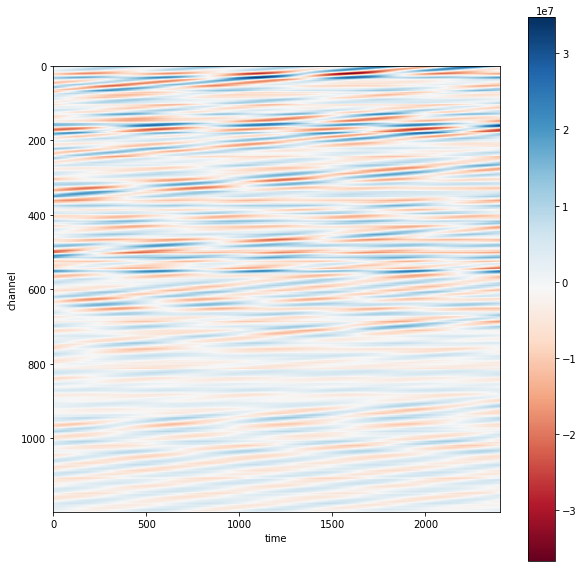

In [146]:
plt.figure(figsize = (10, 10))
plt.imshow(d[::5, ::5], cmap = 'RdBu', aspect = 2)
plt.colorbar()
plt.xlabel("time")
plt.ylabel("channel")

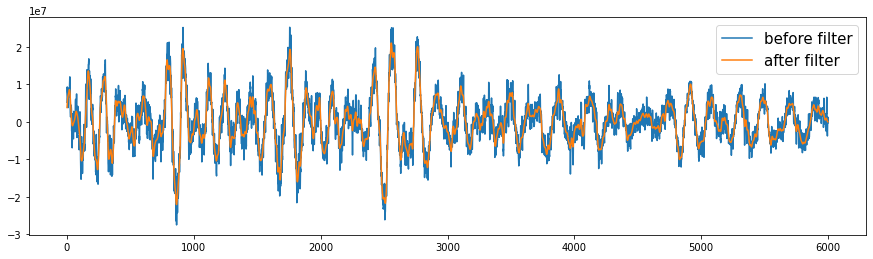

In [155]:
plt.figure(figsize = (15, 4))
plt.plot(rawData[:, 100], label = 'before filter')
plt.plot(d[:, 100], label = 'after filter')
plt.legend(fontsize = 15)

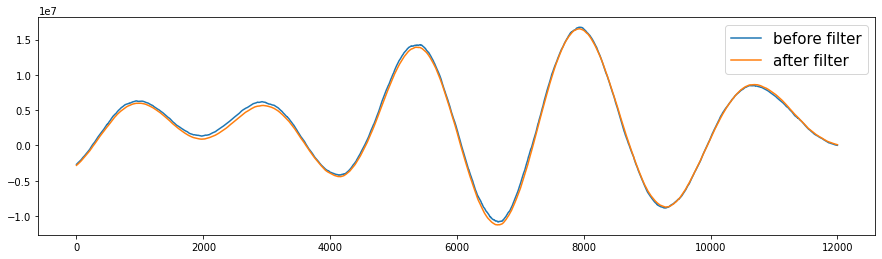

In [154]:
plt.figure(figsize = (15, 4)) 
plt.plot(rawData[1000, :], label = 'before filter')
plt.plot(d[1000, :], label = 'after filter')
plt.legend(fontsize = 15)